In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':[15,15]},font_scale=1.3)
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [4]:
df.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [5]:
df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [6]:
df['last_name'] = df['last_name'].fillna(method='ffill')

In [7]:
df['DOB'] = df['DOB'].fillna(method='bfill')

In [8]:
df['job_title'] = df['job_title'].fillna(df['job_title'].mode()[0])

In [9]:
df['job_industry_category'] = df['job_industry_category'].fillna(method='ffill')

In [10]:
df.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [11]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%Y/%m/%d')
df['Age'] = 2020-df['DOB'].dt.year

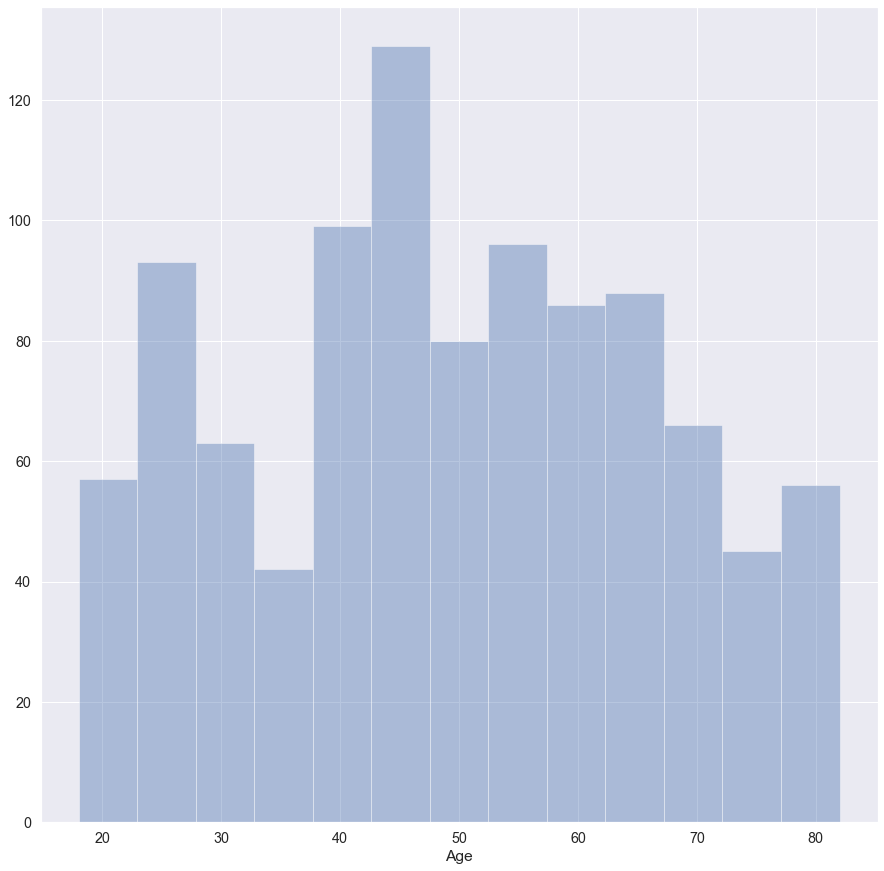

In [12]:
sns.distplot(df['Age'], kde=False)

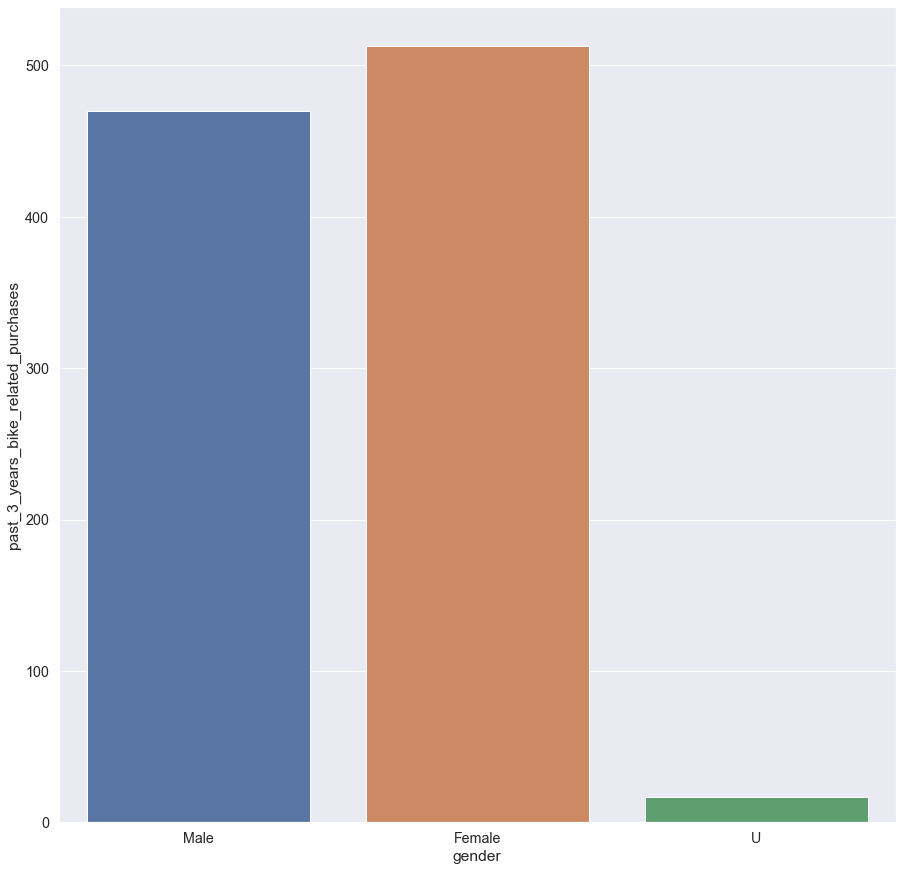

In [13]:
sns.barplot(x='gender', y='past_3_years_bike_related_purchases', data=df, estimator=len)

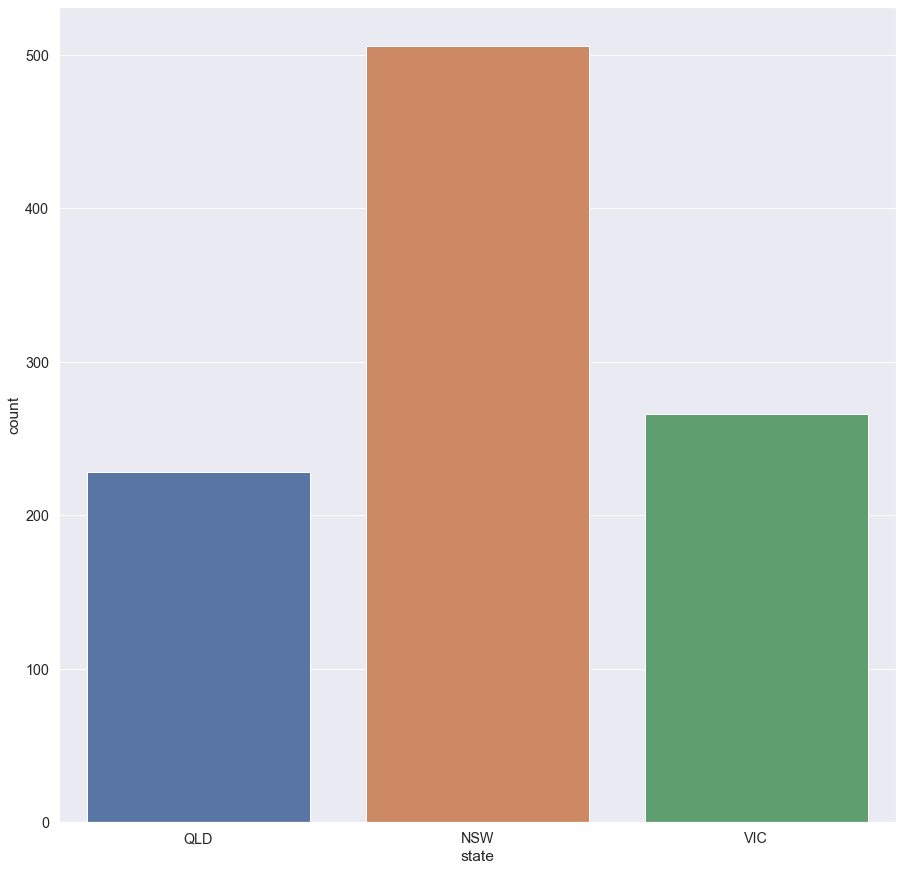

In [14]:
sns.countplot(x='state', data=df)

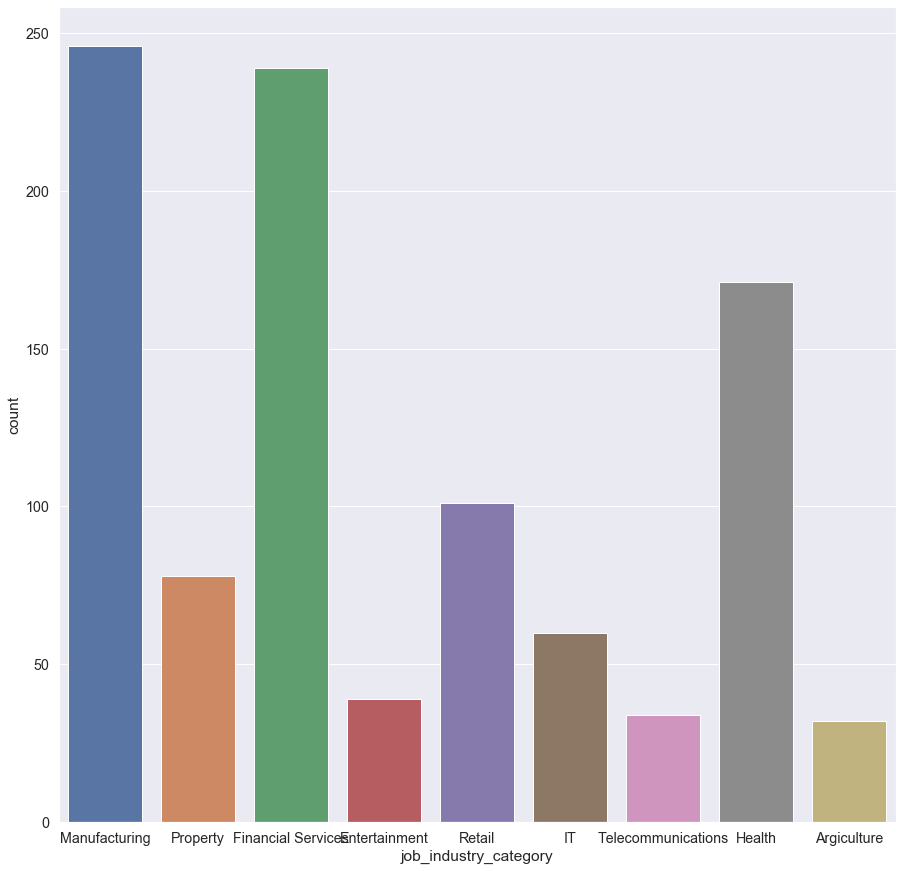

In [15]:
sns.countplot(x='job_industry_category', data=df)

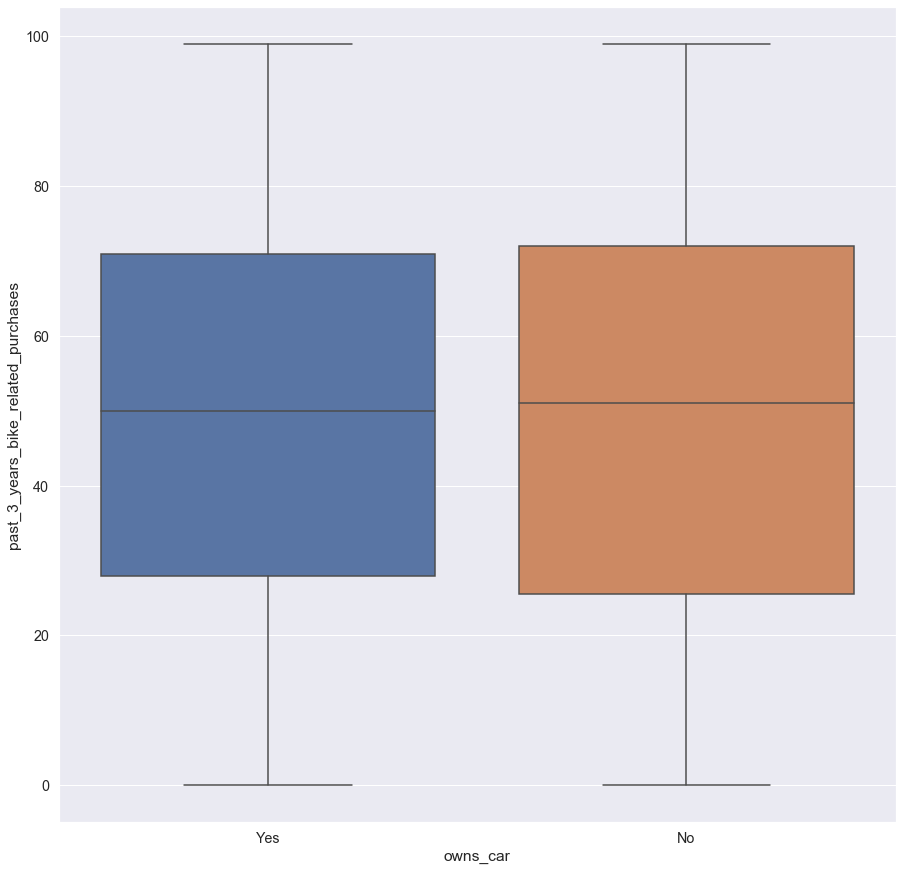

In [30]:
sns.boxplot(x='owns_car',y='past_3_years_bike_related_purchases', data=df)

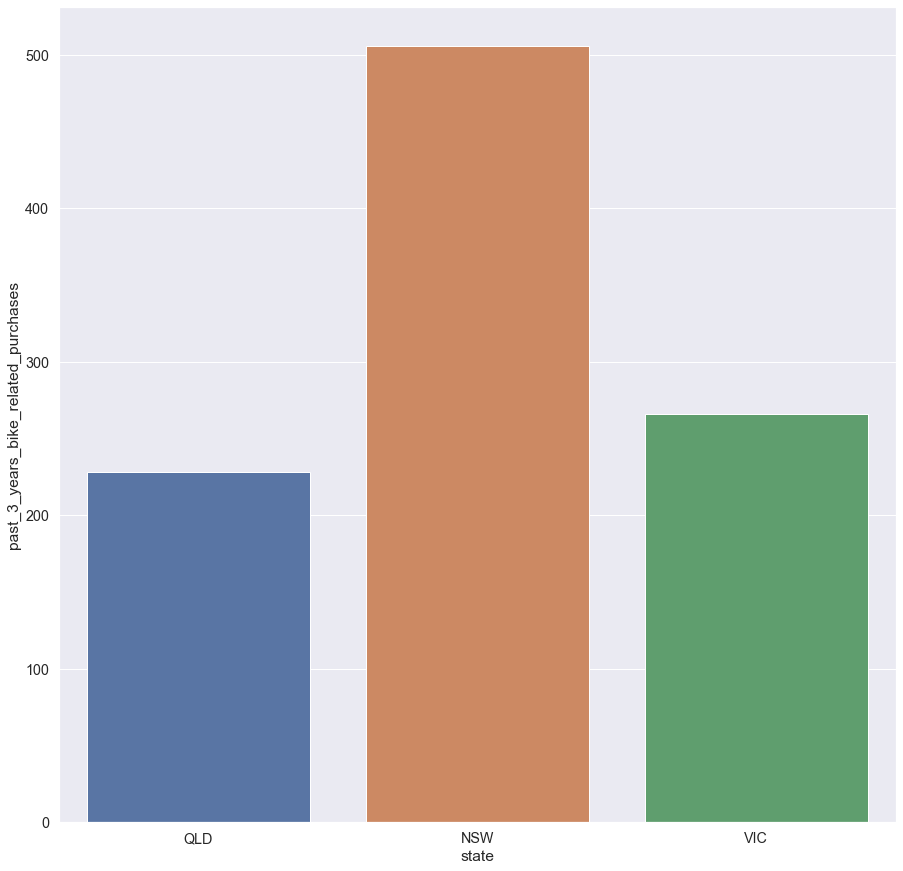

In [27]:
sns.barplot(x='state',y='past_3_years_bike_related_purchases', data=df, estimator=len)